In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.classification import *
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from pprint import pprint

In [60]:
pd.set_option('display.max_columns', None)

In [130]:
data = pd.read_excel('data/data.xlsx')
blind = pd.read_excel('data/blind_set_new.xlsx')
blind.rename(columns={
    'Client ID': 'client_id', 
    'Loan currency': 'loan_currency', 
    'Loan amount': 'loan_amount',
    'Date of disbursement': 'date_of_disbursement', 
    'Date of closure based on contract':'date_of_closure_based_on_contract', 
    'Duration at disbursement (months)': 'duration_at_disbursement_months',
    'Interest rate': 'interest_rate',
    'Max DPD - 3 year': 'max_dpd_3_year',
    'Cumulative days of late payments throughout loan repayments': 'cumulative_days_of_late_payments_throughout_loan_repayments',
    'Quantity of prior loans (at the time of disbursement at CBI)': 'quantity_of_prior_loans_at_the_time_of_disbursement_at_cbi',
    'Type of product': 'type_of_product',
    'Status of loan': 'status_of_loan',
    'Location': 'location',
    'Emirates': 'emirates',
    'Gender': 'gender',
    'Age': 'age',
    'Family status': 'family_status',
    'Monthly income (AED)': 'monthly_income_aed',
    'Quantity of prior loans at CBI': 'quantity_of_prior_loans_at_cbi',
    'Employment sphere': 'employment_sphere',
    'Employment level': 'employment_level',
    'Work experience': 'work_experience',
    'Presence of car': 'presence_of_car',
    'Presence of housing': 'presence_of_housing',
    'Co-borrower': 'coborrower',
    'Collateral': 'collateral',
    'Top Up': 'top_up',
    'DSR': 'dsr'
    }, inplace=True)


In [131]:
blind.drop(columns=['Education level', "Quantity of client's dependents"], inplace=True)

In [132]:
data.head()

,client_id,loan_currency,loan_amount,date_of_disbursement,date_of_closure_based_on_contract,duration_at_disbursement_months,interest_rate,max_dpd_3_year,cumulative_days_of_late_payments_throughout_loan_repayments,quantity_of_prior_loans_at_the_time_of_disbursement_at_cbi,type_of_product,status_of_loan,location,emirates,gender,age,family_status,monthly_income_aed,quantity_of_prior_loans_at_cbi,employment_sphere,employment_level,work_experience,presence_of_car,presence_of_housing,coborrower,collateral,top_up,dsr
0,4964,AED,174400.0,2020-02-26,2025-02-28,60,0.0549,3,3,10,CAR LOAN,Active,UNITED ARAB EMIRATES,DXB Rigga Road BR,Female,51,MARRIED,78096.43,10,Personal salary,MANAGER,5 Years 0 Months,1,0,No,No,No,NaN
1,5331,AED,100000.0,2021-11-16,2026-11-26,60,0.0300,6,11,9,CAR LOAN,Active,UNITED ARAB EMIRATES,DXB Rigga Road BR,Male,59,MARRIED,204166.66,9,Personal salary,PARTNER,19 Years 1 Months,1,0,No,No,No,NaN
2,5214,AED,180000.0,2021-11-24,2024-12-10,36,0.0457,0,0,0,CAR LOAN,Active,JORDAN,DXB Rigga Road BR,Male,45,MARRIED,15000.00,0,Personal salary,MANAGING DIRECTOR,4 Years 3 Months,1,0,No,No,No,NaN
3,4996,AED,171999.0,2018-11-08,2024-06-26,68,0.0686,6,15,4,CAR LOAN,Active,JORDAN,DXB Rigga Road BR,Male,49,MARRIED,50000.00,4,Personal salary,MANAGER,4 Years -4 Months,1,0,No,No,No,49.21
4,5153,AED,50000.0,2021-12-08,2025-11-27,48,0.0457,0,0,5,CAR LOAN,Active,UNITED ARAB EMIRATES,RAK Julphar BR,Male,56,MARRIED,72167.00,5,Personal (Non business),OTHERS,36 Years 4 Months,4,1,No,No,No,NaN


In [133]:
blind.head()

,client_id,loan_currency,loan_amount,date_of_disbursement,date_of_closure_based_on_contract,duration_at_disbursement_months,interest_rate,max_dpd_3_year,cumulative_days_of_late_payments_throughout_loan_repayments,quantity_of_prior_loans_at_the_time_of_disbursement_at_cbi,type_of_product,status_of_loan,location,emirates,gender,age,family_status,monthly_income_aed,quantity_of_prior_loans_at_cbi,employment_sphere,employment_level,work_experience,presence_of_car,presence_of_housing,coborrower,collateral,top_up,dsr
0,5297,AED,566060.30,2022-11-01,2031-10-27,108,0.050,4,8,4,PERSONAL LOAN,Active,UNITED ARAB EMIRATES,"Sharjah, Buhaira Branch",Male,35,MARRIED,6733.0,4,Personal salary,SUPPORTING SERVICES TO AIR TRANSPORT,15 Years 0 Months,0,0,No,No,Yes,NaN
1,5298,AED,346000.00,2018-07-19,2022-08-01,49,0.000,396,518,1,PERSONAL LOAN,Charged off,INDIA,JUMEIRAH BRANCH,Male,39,MARRIED,18000.0,1,Personal (Non business),MANAGER,10 Years 5 Months,0,0,No,No,Yes,49.06
2,5299,AED,78610.00,2017-10-17,2021-11-01,48,0.110,1461,1461,0,PERSONAL LOAN,Charged off,INDIA,DXB Rigga Road BR,Male,44,MARRIED,5615.0,0,Personal (Non business),EXECUTIVE,12 Years -2 Months,0,0,No,No,No,48.67
3,4933,AED,216000.00,2018-01-08,2023-04-25,64,0.000,1009,1193,8,CAR LOAN,Charged off,UNITED ARAB EMIRATES,DXB Rigga Road BR,Female,46,MARRIED,1.0,8,Personal others,OTHER BUSINESSES - OTHER THAN LISTED,22 Years 7 Months,1,0,No,No,No,NaN
4,5300,AED,90437.06,2018-07-19,2023-01-01,54,0.065,59,92,5,PERSONAL LOAN,Paid-off / Closed,PHILIPPINES,DXB Bur Dubai BR,Female,44,SINGLE,9000.0,5,Personal salary,OTHERS,7 Years 7 Months,0,0,No,No,Yes,NaN


In [134]:
data = pd.concat([data, blind], ignore_index=True)

In [136]:
data.drop_duplicates(inplace=True)

In [107]:
# Adding monthly Macro-variables #
macro = pd.read_excel('data/UAE_Monthly1.xlsx')
macro['DateTime'] = macro['DateTime'].astype('datetime64')

data['inflation_rate'] = np.zeros(len(data))
data['manufacturing_PMI'] = np.zeros(len(data))

for i in data.index:
    for j in macro.index:
        if data.loc[i, 'date_of_disbursement'].year == macro.loc[j, 'DateTime'].year and data.loc[i, 'date_of_disbursement'].month == macro.loc[j, 'DateTime'].month:
            data.at[i, 'inflation_rate']    = macro.loc[j, 'Inflation Rate']
            data.at[i, 'manufacturing_PMI'] = macro.loc[j, 'Manufacturing PMI']
            break

In [108]:
# Adding quarterly Macro-variables #
macro2 = pd.read_excel('data/UAE_quarter1.xlsx')
macro2['DateTime'] = macro2['DateTime'].astype('datetime64')

data['CPI'] = [ np.nan for i in data.index]

for i in data.index:
    for j in macro2.index:
        if data.loc[i, 'date_of_disbursement'].year == macro2.loc[j, 'DateTime'].year and data.loc[i, 'date_of_disbursement'].month == macro2.loc[j, 'DateTime'].month:
            data.at[i, 'CPI'] = macro2.loc[j, 'Consumer Price Index CPI']
            break

In [109]:
data_macro = data.copy()

In [110]:
# Creating target columns #
data_macro['max_90_bad'] = (data_macro['max_dpd_3_year'] >= 90).astype(int)
data_macro['cmltv_90_bad'] = (data_macro['cumulative_days_of_late_payments_throughout_loan_repayments'] >= 90).astype(int)

print(data_macro['cmltv_90_bad'].value_counts())

0    3483
1     759
Name: cmltv_90_bad, dtype: int64


In [111]:
target = 'cmltv_90_bad'

cat_feats = [
    'location',
    'emirates',
    'gender',
    'family_status',
    'employment_sphere',
    'collateral',
    'type_of_product',
    'employment_level'
]
num_feats = [
    'loan_amount',
    'duration_at_disbursement_months',
    'interest_rate',
    'quantity_of_prior_loans_at_the_time_of_disbursement_at_cbi',
    'age',
    'monthly_income_aed',
    'work_experience',
    'inflation_rate',
    'manufacturing_PMI',
    'presence_of_car',
    'presence_of_housing',
    'CPI'
]

ignore_feats = [
    'client_id',
    'loan_currency',
    'date_of_disbursement',
    'date_of_closure_based_on_contract',
    'max_dpd_3_year',
    'cumulative_days_of_late_payments_throughout_loan_repayments',
    'status_of_loan',
    'quantity_of_prior_loans_at_cbi',
    'coborrower',
    'top_up',
    'dsr',
    'max_90_bad'
]

In [112]:
def isnan(num):
    return num != num

# Converting Work experience feature to the months #
for i in data_macro.index:
    it = data_macro.loc[i, 'work_experience']
    years, months, gap, minus = 0, 0, False, False

    if isnan(it):
        continue
    
    # Extracting year and month from the string #
    for j in it :
        if j >= '0' and j <= '9' :
            if not gap :
                years = years*10 + int(j)
            else :
                months = months*10 + int(j)
        elif j == '-' :
            minus = True
            gap = True
        else :
            gap = True
    # Setting the new value to the DataFrame #
    if minus :
        months *= -1
        
    data_macro.at[i, 'work_experience'] = int(years*12 + months)
    
data_macro['work_experience'] = data_macro['work_experience'].astype('float32')

In [113]:
data_macro[data_macro['work_experience'].isna()][['loan_currency', 'interest_rate', 'work_experience']]

,loan_currency,interest_rate,work_experience
85,AED,0.068444,NaN
143,AED,0.080508,NaN
2097,AED,0.045000,NaN
2536,AED,0.120000,NaN
3264,AED,0.100000,NaN


In [114]:
data_na = data_macro.dropna(subset=cat_feats+num_feats)

In [115]:
# Choosing only Closed loans & Active loans that are already bad #
data_closed_or_bad = data_na[(data_na['status_of_loan'] == 'Active') & (data_na[target] == 1) | (data_na['status_of_loan'] != 'Active')]

In [116]:
data_closed_or_bad.drop(columns=["loan_currency"], inplace=True)
ignore_feats.remove('loan_currency')

In [117]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_closed_or_bad, train_size=0.8, random_state=89, stratify=data_closed_or_bad[target])

In [118]:
# Target mean encoding #
cols = cat_feats

for col in cols:
    stats = train[target].groupby(train[col]).agg(['count', 'mean'])
    train[col+'_mean_encoded'] = train[col].copy()
    test[col+'_mean_encoded'] = test[col].copy()
    
    for i in train[col+'_mean_encoded'].unique():
        train[col+'_mean_encoded'].replace(i, stats.loc[i]['mean'], inplace=True)        
        test[col+'_mean_encoded'].replace(i, stats.loc[i]['mean'], inplace=True)

In [119]:
# Removing classes that are in test set but not in train set #
for i in test.index:
    for col in cat_feats:
        if type(test[col+'_mean_encoded'][i]) == str:
            test.drop(i,inplace=True)
            break

In [120]:
# We move all categorical variables to numerical list #
for i in cat_feats:
    num_feats.extend( [i+'_mean_encoded'] )
    ignore_feats.extend([i])

cat_feats.clear()

In [121]:
train[train['employment_level'] == 'ADMINISTRATOR'][['employment_level', 'employment_level_mean_encoded']]

,employment_level,employment_level_mean_encoded
2095,ADMINISTRATOR,0.205882
3059,ADMINISTRATOR,0.205882
2547,ADMINISTRATOR,0.205882
2014,ADMINISTRATOR,0.205882
1186,ADMINISTRATOR,0.205882
...,...,...
2962,ADMINISTRATOR,0.205882
2308,ADMINISTRATOR,0.205882
2526,ADMINISTRATOR,0.205882
4612,ADMINISTRATOR,0.205882


In [122]:
# CHECK IF ALL COLUMNS ARE USED OR IF THERE IS AN EXTRA COLUMN
all_columns = cat_feats + num_feats + ignore_feats
dataset_columns = list(train.columns)
dataset_columns.remove(target)

if sorted(all_columns) == sorted(dataset_columns) :
    print( 'All variables are found in feature lists' )
else :
    print('Features found in dataset but not in lists :')
    for i in dataset_columns :
        if i not in all_columns :
            print(i)
    
    print('-'*50)
    print('Features found in lists but not in dataset')
    for i in all_columns :
        if i not in dataset_columns:
            print(i)

All variables are found in feature lists


In [123]:
# CHECK IF ALL COLUMNS ARE USED OR IF THERE IS AN EXTRA COLUMN
all_columns = cat_feats + num_feats + ignore_feats
dataset_columns = list(train.columns)
dataset_columns.remove(target)
sorted(all_columns) == sorted(dataset_columns)

True

In [170]:
exp = ClassificationExperiment()
exp.setup(
    data=train,
    test_data=test,
    target=target,
    index=False,
    fold_shuffle=True,
    
    # categorical_imputation='mode',
    # numeric_imputation='mean',
    
    categorical_features=cat_feats,
    numeric_features=num_feats,
    ignore_features=ignore_feats,
    ordinal_features={},

    max_encoding_ohe=70,
    
    remove_multicollinearity=True,
    multicollinearity_threshold=0.85,
    
    use_gpu=False,
    memory=False,

    session_id=2
)

,Description,Value
0,Session id,2
1,Target,cmltv_90_bad
2,Target type,Binary
3,Original data shape,"(3402, 40)"
4,Transformed data shape,"(3402, 21)"
5,Transformed train set shape,"(2734, 21)"
6,Transformed test set shape,"(668, 21)"
7,Ignore features,19
8,Numeric features,20
9,Rows with missing values,8.5%


In [174]:
# train catboost
trained_model_catboost = exp.create_model(
    estimator='catboost',
    iterations=1000,
    learning_rate=0.02,
    cross_validation=False,
    return_train_score=True
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.8353,0.8019,0.3431,0.7015,0.4608,0.3768,0.4105
Train,0.9360,0.9875,0.7005,0.9901,0.8205,0.7829,0.8003


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [185]:
best = exp.compare_models(include=['rf', 'xgboost', 'catboost', 'gbc'], fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8376,0.8249,0.3449,0.7378,0.4688,0.3879,0.4275,0.0940
catboost,CatBoost Classifier,0.8369,0.8207,0.3537,0.7264,0.4745,0.3915,0.4276,0.8900
rf,Random Forest Classifier,0.8295,0.7840,0.3064,0.7207,0.4283,0.3468,0.3916,0.0600
xgboost,Extreme Gradient Boosting,0.8266,0.7966,0.3992,0.6341,0.4890,0.3914,0.4070,0.0520


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

In [186]:
tuned_boos = exp.tune_model(best, n_iter=100, fold=5)
calibrated_boost = exp.calibrate_model(tuned_boos, return_train_score=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8446,0.8183,0.3246,0.8222,0.4654,0.3939,0.4525
1,0.8355,0.8270,0.2895,0.7857,0.4231,0.3502,0.4099
2,0.8208,0.8018,0.3246,0.6379,0.4302,0.3371,0.3642
3,0.8519,0.8318,0.4087,0.7833,0.5371,0.4592,0.4937
4,0.8297,0.7996,0.2982,0.7234,0.4224,0.3422,0.3886
Mean,0.8365,0.8157,0.3291,0.7505,0.4556,0.3765,0.4218
Std,0.0109,0.0130,0.0422,0.0646,0.0437,0.0460,0.0462


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [182]:
calibrated_catboost = exp.calibrate_model(best, fold=5, return_train_score=True)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [187]:
# GET PERFORMANCE METRICS:
threshold = 0.25
predictions = exp.predict_model(calibrated_boost, raw_score=True, encoded_labels=True)
predictions['prediction_label'] = (predictions['prediction_score_1'] > threshold).astype(int)
# predictions.to_excel('predictions.xlsx', index=False)

report         = classification_report(predictions[target], predictions['prediction_label'], output_dict=True)
tn, fp, fn, tp = confusion_matrix(     predictions[target], predictions['prediction_label']).ravel()
auc            = roc_auc_score(        predictions[target], predictions['prediction_score_1'])

report['threshold'] = threshold
report['TN'] = tn
report['FP'] = fp
report['FN'] = fn
report['TP'] = tp
report['AUC'] = round(auc, 4)
report['model NPL'] = round(fn/(tn+fn)*100, 2)
report[' real NPL'] = round(report['1']['support']/(report['1']['support'] + report['0']['support']) * 100, 2)
report['approval rate'] = round((fn + tn)/report['weighted avg']['support']*100, 2)
report['good correct'] = round(tn/(fp+tn)*100, 2)
report['bad correct'] = round(tp/(fn+tp)*100, 2)

pprint(report, sort_dicts=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8174,0.7941,0.2993,0.6119,0.4020,0.3089,0.3364


{'0': {'precision': 0.8803921568627451,
       'recall': 0.8455743879472694,
       'f1-score': 0.8626320845341018,
       'support': 531},
 '1': {'precision': 0.4810126582278481,
       'recall': 0.5547445255474452,
       'f1-score': 0.5152542372881356,
       'support': 137},
 'accuracy': 0.7859281437125748,
 'macro avg': {'precision': 0.6807024075452965,
               'recall': 0.7001594567473572,
               'f1-score': 0.6889431609111187,
               'support': 668},
 'weighted avg': {'precision': 0.7984834872325342,
                  'recall': 0.7859281437125748,
                  'f1-score': 0.7913884242456327,
                  'support': 668},
 'threshold': 0.25,
 'TN': 449,
 'FP': 82,
 'FN': 61,
 'TP': 76,
 'AUC': 0.7941,
 'model NPL': 11.96,
 ' real NPL': 20.51,
 'approval rate': 76.35,
 'good correct': 84.56,
 'bad correct': 55.47}


In [188]:
final_gboosting = exp.finalize_model(calibrated_boost)

In [189]:
exp.save_model(final_gboosting, 'gboosting_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['loan_amount',
                                              'duration_at_disbursement_months',
                                              'interest_rate',
                                              'quantity_of_prior_loans_at_the_time_of_disbursement_at_cbi',
                                              'age', 'monthly_income_aed',
                                              'work_experience',
                                              'inflation_rate',
                                              'manufacturing_PMI',
                                              'presence_of_car',
                                              'presence_of_housi...
                                                                                   max_depth=3,
                                                         

In [129]:
# THRESHOLD TEST
results = pd.DataFrame(columns=['threshold', 'Accuracy', 'AUC', 'TN', 'FP', 'FN', 'TP'])
predictions = exp.predict_model(calibrated_catboost, raw_score=True, encoded_labels=True)

for thres in [x / 100 for x in range(10, 31, 5)]:
    predictions['prediction_label'] = (predictions['prediction_score_1'] > thres).astype(int)
    tn, fp, fn, tp = confusion_matrix(predictions[target], predictions['prediction_label']).ravel()
    auc = roc_auc_score(predictions[target], predictions['prediction_score_1'])
    accuracy = accuracy_score(predictions[target], predictions['prediction_label'])

    row = [thres, accuracy, auc, tn, fp, fn, tp]
    results.loc[len(results)] = row
    
results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8204,0.8060,0.3066,0.6269,0.4118,0.3202,0.3488


,threshold,Accuracy,AUC,TN,FP,FN,TP
0,0.10,0.549401,0.806019,241.0,290.0,11.0,126.0
1,0.15,0.735030,0.806019,393.0,138.0,39.0,98.0
2,0.20,0.778443,0.806019,440.0,91.0,57.0,80.0
3,0.25,0.806886,0.806019,471.0,60.0,69.0,68.0
4,0.30,0.815868,0.806019,489.0,42.0,81.0,56.0


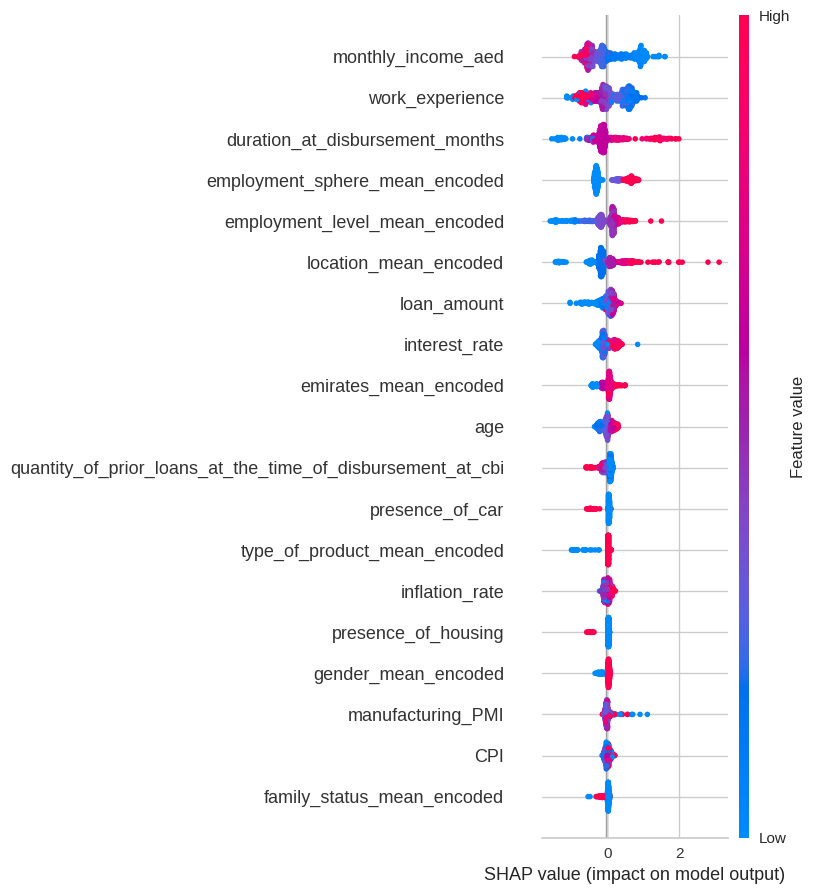

In [27]:
exp.interpret_model(trained_model_catboost)

In [194]:
from create_validator import create_validator

create_validator(data_closed_or_bad, 'cmltv_90_bad', 'cbi__variable_validator')